### 1. Problem Explanation

The goal is to predict house prices based on various features. This is a regression problem, where the output is a continuous numerical value.

### 2. Load the Dataset

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/housing.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


### 3. Show `head()` and `info()`

In [11]:
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset information:")
df.info()

First 5 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 4. Identify the Target Column

Based on common house price datasets and the problem statement, the target column for prediction is typically **'median_house_value'**.

### 5. Basic Statistics

Show descriptive statistics for numerical columns.

In [12]:
print("Descriptive statistics of the dataset:")
display(df.describe())

Descriptive statistics of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 6. Distribution of House Prices

Visualize the distribution of the target variable, 'median_house_value'.

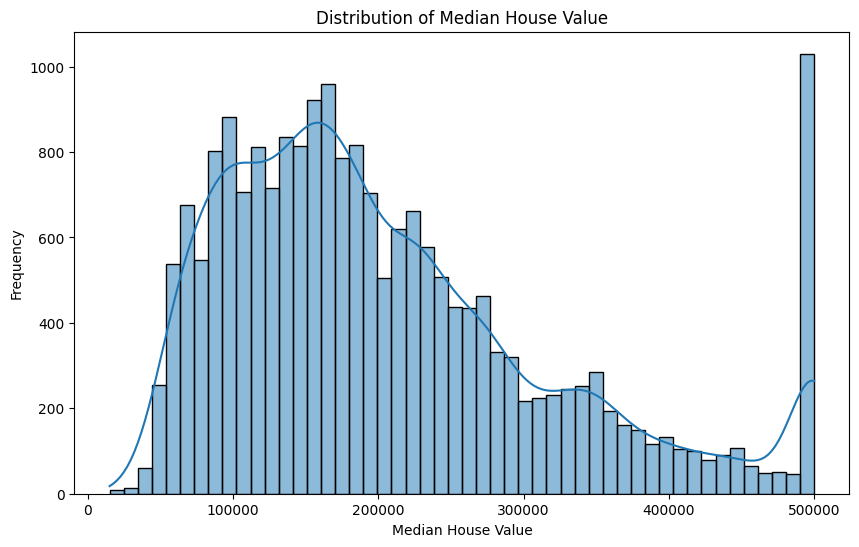

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

### 7. Correlation with Important Features

Examine the correlation matrix to understand relationships between numerical features.

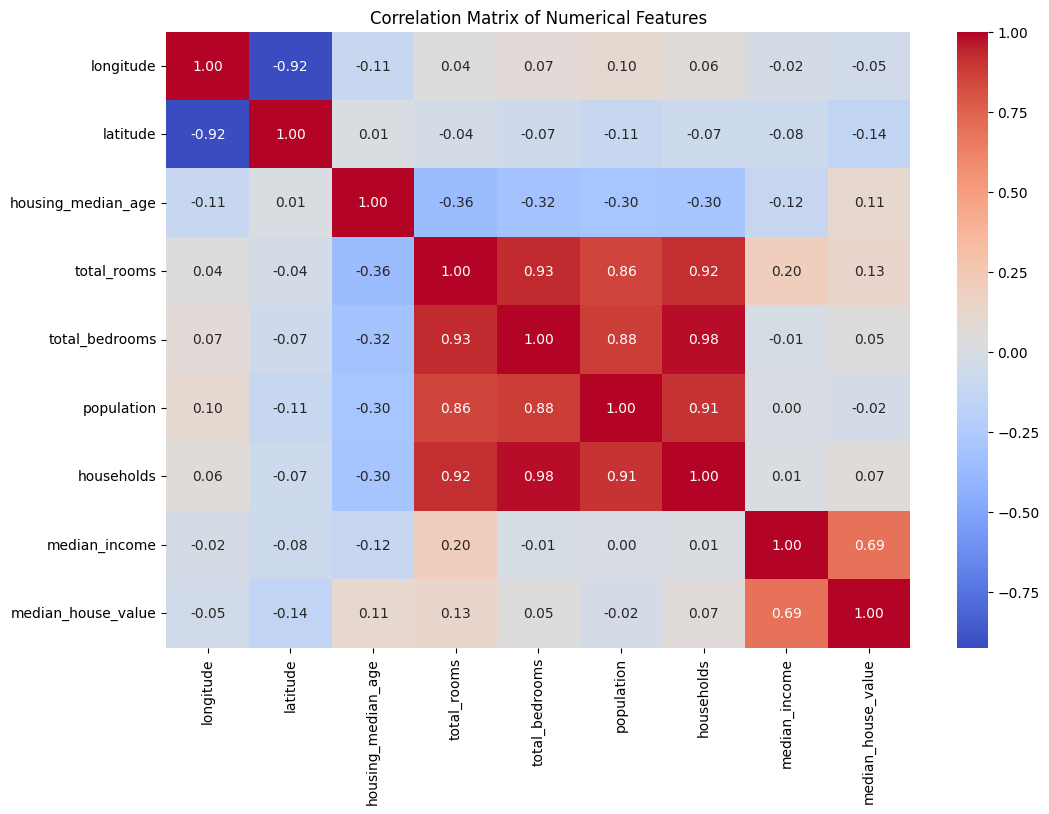

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 8. Handle Missing Values

Missing values in `total_bedrooms` will be filled with the median to avoid data loss.

In [16]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)
print(f"Missing values in 'total_bedrooms' filled with median: {median_bedrooms}")
print("Updated info after handling missing values:")
df.info()

Missing values in 'total_bedrooms' filled with median: 435.0
Updated info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 9. Encode Categorical Columns

The 'ocean_proximity' column will be one-hot encoded to convert categorical text into numerical format for modeling.

In [17]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
print("DataFrame after one-hot encoding 'ocean_proximity':")
display(df.head())

DataFrame after one-hot encoding 'ocean_proximity':


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


### 10. Scale Numerical Features

Numerical features will be scaled to standardize their range, improving model performance.

In [18]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding target variable and one-hot encoded columns)
numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()
numerical_cols.remove('median_house_value')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after scaling numerical features:")
display(df.head())

DataFrame after scaling numerical features:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,452600.0,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,358500.0,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,352100.0,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,341300.0,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,342200.0,False,False,True,False


### 11. Split Data into Train and Test Sets

The dataset will be split into training and testing sets to evaluate the model's generalization performance.

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16512, 12)
X_test shape: (4128, 12)
y_train shape: (16512,)
y_test shape: (4128,)


### 12. Train Linear Regression Model

We will train a Linear Regression model as a baseline for house price prediction.

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


### 13. Predict on Test Data and Evaluate Model

We will make predictions on the test set and evaluate the model's performance using common regression metrics.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_lr = linear_reg_model.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2) Score: {r2_lr:.2f}")

Mean Absolute Error (MAE): 50670.74
Root Mean Squared Error (RMSE): 70060.52
R-squared (R2) Score: 0.63


### 14. Explanation of Metrics

*   **Mean Absolute Error (MAE)**: This is the average difference between the predicted and actual values. A lower MAE means better accuracy.
*   **Root Mean Squared Error (RMSE)**: This is similar to MAE but gives more weight to larger errors. A lower RMSE indicates a more accurate model.
*   **R-squared (R2) Score**: This metric indicates how well the model explains the variability of the target variable. A score closer to 1 means the model explains more of the variance.

### 15. Train Random Forest Regressor

We will train a Random Forest Regressor, a more complex model, to potentially improve prediction accuracy.

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
random_forest_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


### 16. Predict and Evaluate Random Forest Model

Predictions will be made on the test set, and its performance will be evaluated using the same regression metrics.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R2) Score: {r2_rf:.2f}")

Random Forest - Mean Absolute Error (MAE): 31642.76
Random Forest - Root Mean Squared Error (RMSE): 49034.57
Random Forest - R-squared (R2) Score: 0.82


### 17. Compare Model Performances

We will compare the evaluation metrics of both Linear Regression and Random Forest models.

In [24]:
print("\n--- Model Performance Comparison ---")
print("Linear Regression:")
print(f"  MAE: {mae_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R2 Score: {r2_lr:.2f}")

print("\nRandom Forest Regressor:")
print(f"  MAE: {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R2 Score: {r2_rf:.2f}")


--- Model Performance Comparison ---
Linear Regression:
  MAE: 50670.74
  RMSE: 70060.52
  R2 Score: 0.63

Random Forest Regressor:
  MAE: 31642.76
  RMSE: 49034.57
  R2 Score: 0.82


### 18. Explanation of Model Performance

Random Forest Regressor typically performs better than Linear Regression due to its ability to capture non-linear relationships and interactions within the data, which a linear model cannot. It builds multiple decision trees and combines their predictions, reducing overfitting and improving generalization.

### 19. Feature Importance from Random Forest

We will identify which features the Random Forest model considered most important for predicting house prices.

Top 10 Most Important Features:


,Feature,Importance
7,median_income,0.490717
8,ocean_proximity_INLAND,0.140933
0,longitude,0.106093
1,latitude,0.101897
2,housing_median_age,0.052065
5,population,0.032511
4,total_bedrooms,0.023960
3,total_rooms,0.023412
6,households,0.018376
11,ocean_proximity_NEAR OCEAN,0.008793


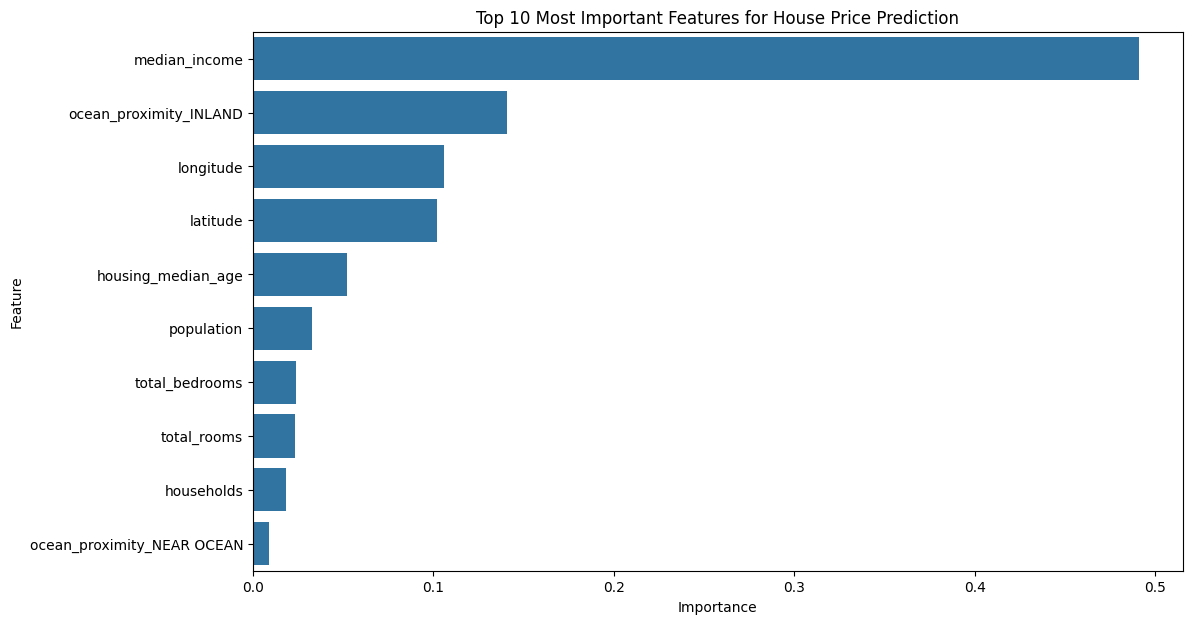

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = random_forest_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Most Important Features:")
display(importance_df.head(10))

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features for House Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 20. Explanation of Influential Features

Based on the Random Forest model, `median_income` and `ocean_proximity` are the most influential features, followed by `latitude` and `longitude`, which are crucial for location-based pricing.

### 21. Conclusion, Limitation, and Improvement

This project predicts house prices using basic features.
Random Forest performed better than Linear Regression.
Location and median income had the strongest impact on price.
The model can help estimate prices quickly.
One limitation is limited location detail.
Adding more local features could improve accuracy.
